## Poročilo vaja 3.2
#### Preverjanje hipotez: Učinki HIIT vadbe pri poklicnih nogometaših

Analiziramo učinke HIIT vadbe za poklicne nogometaše. Imamo 18 nogometašev, s katerimi izvajamo HIIT vadbo in merimo njihove sposobnosti z obremenitvenimi testi pred začetkoma cikla HIIT vadbe in po končanem ciklu vadb.
1. Analizirajmo vse spremenljivke.
2. Izvedi opisno statistiko glede na meritve pred in po vadbi.
3. Opremi opisno statistiko z ustreznimi grafi.
4. Izvedi ustrezne statistične teste in ugotovi, kje so razlike statistično značilne.
5. Uporabi ustrezno statistično metodologijo in jo ustrezno zapiši.
6. Ustrezno predstavi rezultate in jih komentiraj.
7. Podaj končne zaključke analize.

In [17]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import ttest_rel, wilcoxon, mannwhitneyu, shapiro
import os

path = os.getcwd()

# convert ',' to '.' in the data
cols_to_convert = ['LACTATE THRESHOLD 1 POST TEST SPEED (km/h)',
                   'LACTATE THRESHOLD 2 PRE TEST SPEED (km/h)',
                   'LACTATE THRESHOLD 2 POST TEST SPEED (km/h)',
                   'vVO2max/ km/h    (pre)',
                   'vVo2max/ km/h (post)']

converters = {col: lambda x: float(x.replace(',', '.')) for col in cols_to_convert}

df = pd.read_csv(path + '\\data\\UJ_HIIT_groups-pre-post-intervention-za-analizo.csv', delimiter=';', converters=converters)

# convert int64 columns into float64
int_cols = df.select_dtypes(include='int').columns
df[int_cols] = df[int_cols].astype('float64')

In [18]:
display(df.head())

,NAME,LACTATE THRESHOLD 1 PRE-TEST HEART RATE (bpm),LACTATE THRESHOLD 1 POST TEST HEART RATE (bpm),LACTATE THRESHOLD 1 PRE TEST SPEED (km/h),LACTATE THRESHOLD 1 POST TEST SPEED (km/h),LACTATE THRESHOLD 1 PRE TEST TIME (sec),LACTATE THRESHOLD 1 POST TEST TIME (sec),LACTATE THRESHOLD 2 PRE TEST HEART RATE (bpm),LACTATE THRESHOLD 2 POST TEST HEART RATE (bpm),LACTATE THRESHOLD 2 PRE TEST SPEED (km/h),...,LACTATE THRESHOLD 2 POST TEST TIME (sec),V02MAX (ml/kg/min) PRE-TEST,V02MAX (ml/kg/min) POST TEST,HRmax (pre),Hrmax (post),vVO2max/ km/h (pre),vVo2max/ km/h (post),Time @V02max occurance (pre),Time @V02max occurance (post),Group
0,HIIT_1,79.00,96.00,6.00,6.00,172.00,110.00,137.00,163.00,9.60,...,464.00,39.00,48.00,166.00,182.00,13.20,15.60,610.00,784.00,1.00
1,HIIT_17,114.00,126.00,6.00,6.00,212.00,168.00,156.00,172.00,9.60,...,540.00,42.00,48.00,172.00,175.00,14.40,18.00,637.00,853.00,1.00
2,HIIT_6,73.00,130.00,6.00,8.40,115.00,295.00,114.00,166.00,8.40,...,562.00,44.00,50.00,161.00,172.00,13.20,15.60,595.00,711.00,1.00
3,HIIT_12,92.00,125.00,6.00,8.40,89.00,299.00,132.00,152.00,9.60,...,540.00,42.00,48.00,175.00,180.00,13.20,15.60,574.00,750.00,1.00
4,HIIT_18,110.00,130.00,6.00,8.40,214.00,277.00,160.00,174.00,12.00,...,630.00,54.00,54.00,175.00,184.00,16.80,18.00,801.00,894.00,1.00


#### 1. Analiziramo normalnost spremenljivk

In [19]:
# descriptive statistics without checking for normality
pd.options.display.float_format = '{:.2f}'.format

cols = df.columns.tolist()[1:-1:]
table_pre = df[cols[:-1:2]]
table_post = df[cols[1::2]]
normality = [] 
norm_table = []
for pre, post in zip(table_pre, table_post):
    var_pre, var_post = df[pre], df[post]
    stat_pre, p_pre = shapiro(var_pre)
    stat_post, p_post = shapiro(var_post)
    p_pre_str = '<0.01' if p_pre < 0.01 else f'{p_pre:.3f}'
    p_post_str = '<0.01' if p_post < 0.01 else f'{p_post:.3f}'
    norm_table.append([pre, f'{stat_pre:.3f}', p_pre_str])
    norm_table.append([post, f'{stat_post:.3f}', p_post_str])
    
    if p_pre < 0.05 or p_post < 0.05:
        normality.append(False)
    else:
        normality.append(True)
        
norm_summary = pd.DataFrame(norm_table, columns=['', 'Statistic', 'p-value'])
    
display(norm_summary.style.set_caption('Table 1: Shapiro-Wilk test of normality')\
          .set_table_styles([
              {'selector': 'caption', 'props': [('font-size', '16px'), 
                                                ('font-weight', 'bold'), 
                                                ('border-bottom', '1px solid black'),
                                                ('width', '100%')]},
              {'selector': 'td', 'props': 'text-align: left;'}
          ])\
          .hide())

C:\Users\Jaka.Kovse\AppData\Local\Programs\Python\Python312\Lib\site-packages\scipy\stats\_axis_nan_policy.py:573: UserWarning: scipy.stats.shapiro: Input data has range zero. The results may not be accurate.
  res = hypotest_fun_out(*samples, **kwds)


,Statistic,p-value
LACTATE THRESHOLD 1 PRE-TEST HEART RATE (bpm),0.985,0.985
LACTATE THRESHOLD 1 POST TEST HEART RATE (bpm),0.873,0.020
LACTATE THRESHOLD 1 PRE TEST SPEED (km/h),1.000,1.000
LACTATE THRESHOLD 1 POST TEST SPEED (km/h),0.624,<0.01
LACTATE THRESHOLD 1 PRE TEST TIME (sec),0.871,0.018
LACTATE THRESHOLD 1 POST TEST TIME (sec),0.908,0.079
LACTATE THRESHOLD 2 PRE TEST HEART RATE (bpm),0.956,0.529
LACTATE THRESHOLD 2 POST TEST HEART RATE (bpm),0.809,<0.01
LACTATE THRESHOLD 2 PRE TEST SPEED (km/h),0.836,<0.01
LACTATE THRESHOLD 2 POST TEST SPEED (km/h),0.955,0.507


**Interpretacija testa normalnosti:** Spremenljivke ***LACATATE THRESHOLD 2 TEST TIME***, ***VO2MAX***, ***HRmax***, ***vVO2max/km/h*** in ***Time@VO2max occurance*** so normalno porazdeljene, saj p vrednosti Shapiro-Wilk testa pred in po intervenciji niso nižje od mejne vrednosti 0.05. To pomeni, da bomo vpliv intervencije preverjali s parnim t-testom, medtem, ko bomo za ostale spremenljivke uporabili Wilcoxon-ov test.

#### 2. Opisna statistika pred in po intervenciji

In [20]:

display(table_pre.describe().loc[['mean', 'std', '50%', '25%', '75%']].rename(index={
    '50%': 'median',
    '25%': '25th perc',
    '75%': '75th prec'
}).T.style.set_caption('Descriptive statistics: pre intervention')\
    .format('{:.2f}')\
    .set_table_styles([
              {'selector': 'caption', 'props': [('font-size', '16px'), 
                                                ('font-weight', 'bold'), 
                                                ('border-bottom', '1px solid black'),
                                                ('width', '100%')]},
              {'selector': 'td', 'props': 'text-align: left;'}
          ]))

,mean,std,median,25th perc,75th prec
LACTATE THRESHOLD 1 PRE-TEST HEART RATE (bpm),97.72,12.85,97.00,91.25,107.75
LACTATE THRESHOLD 1 PRE TEST SPEED (km/h),6.00,0.00,6.00,6.00,6.00
LACTATE THRESHOLD 1 PRE TEST TIME (sec),110.11,55.67,86.50,67.50,158.00
LACTATE THRESHOLD 2 PRE TEST HEART RATE (bpm),140.28,16.54,137.50,130.50,154.75
LACTATE THRESHOLD 2 PRE TEST SPEED (km/h),9.20,1.37,9.60,8.40,9.60
LACTATE THRESHOLD 2 PRE TEST TIME (sec),346.83,89.32,335.50,284.50,379.50
V02MAX (ml/kg/min) PRE-TEST,43.94,4.65,44.00,42.00,45.75
HRmax (pre),169.61,7.32,169.50,164.50,175.00
vVO2max/ km/h (pre),13.80,1.55,13.80,13.20,14.40
Time @V02max occurance (pre),605.56,113.69,625.00,536.50,653.00


In [21]:
table_post.describe().loc[['mean', 'std', '50%', '25%', '75%']].rename(index={
    '50%': 'median',
    '25%': '25th perc',
    '75%': '75th prec'
}).T.style.set_caption('Descriptive statistics: post intervention')\
    .format('{:.2f}')\
    .set_table_styles([
              {'selector': 'caption', 'props': [('font-size', '16px'), 
                                                ('font-weight', 'bold'), 
                                                ('border-bottom', '1px solid black'),
                                                ('width', '100%')]},
              {'selector': 'td', 'props': 'text-align: left;'}
          ])

,mean,std,median,25th perc,75th prec
LACTATE THRESHOLD 1 POST TEST HEART RATE (bpm),122.78,10.05,125.00,121.00,127.75
LACTATE THRESHOLD 1 POST TEST SPEED (km/h),7.47,1.20,8.40,6.00,8.40
LACTATE THRESHOLD 1 POST TEST TIME (sec),229.11,64.90,241.00,195.00,279.25
LACTATE THRESHOLD 2 POST TEST HEART RATE (bpm),160.17,17.02,165.00,155.25,172.00
LACTATE THRESHOLD 2 POST TEST SPEED (km/h),11.73,2.08,12.00,9.90,13.20
LACTATE THRESHOLD 2 POST TEST TIME (sec),494.06,128.20,526.00,405.25,565.00
V02MAX (ml/kg/min) POST TEST,50.56,3.40,49.50,48.00,53.00
Hrmax (post),180.06,6.48,180.00,176.50,183.50
vVo2max/ km/h (post),16.33,1.49,15.60,15.60,17.70
Time @V02max occurance (post),789.56,83.45,778.00,722.50,847.00


#### 3. Opremi opisno statistiko z ustreznimi grafi.

In [22]:
# draw some plots
def draw_bar_chart(val_vars: list, val_name: str, title_str: str):
    df_long = pd.melt(df,
                      id_vars=['NAME', 'Group'],
                      value_vars=val_vars,
                      var_name='Time',
                      value_name=val_name)
    
    df_long['Time'] = np.where(df_long['Time'] == val_vars[0], 'post', 'pre')
    plt.figure()
    sns.barplot(data=df_long, x='Group', y=val_name, hue='Time',)
    plt.title(title_str)

In [23]:
cols = list(df.columns)[1:-1:]
variable_pairs = [[cols[i], cols[i+1]] for i in range(0, len(cols), 2)]
val_names = ['Lactate Threshold HR 1',
             'Lactate Threshold speed 1',
             'Lactate Threshold time 1',
             'Lactate Threshold HR 2',
             'Lactate Threshold speed 2',
             'Lactate Threshold time 2',
             'VO2max', 'HRmax', 'vVO2max',
             'Time @V02max occurance']

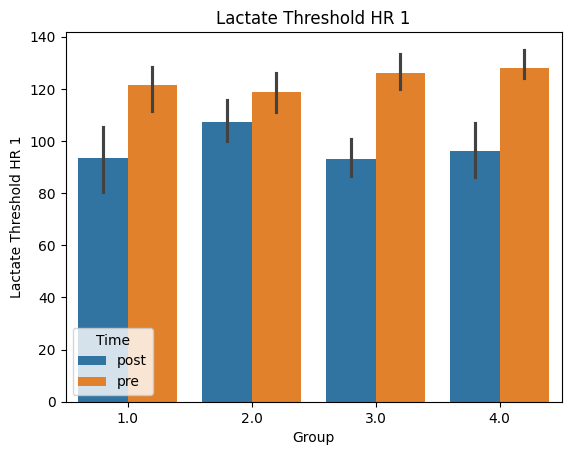

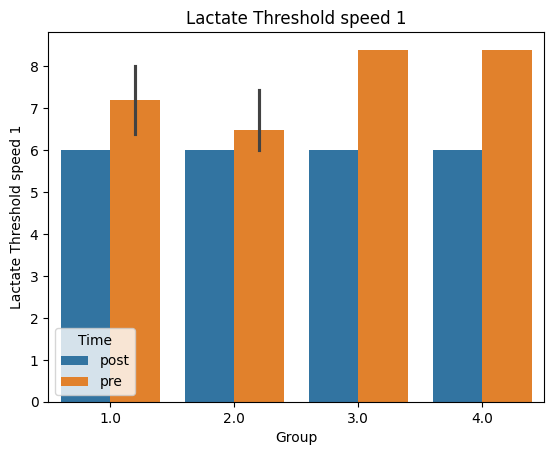

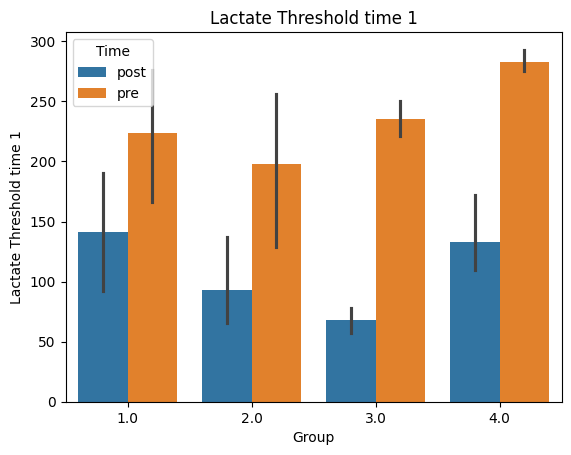

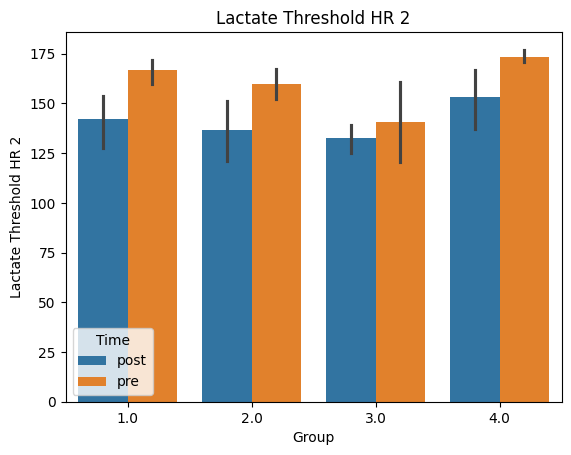

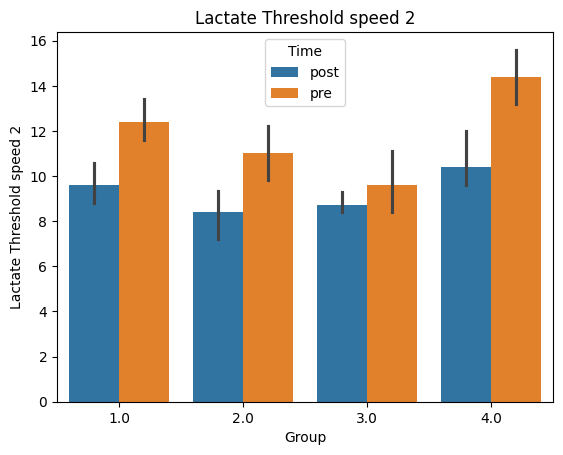

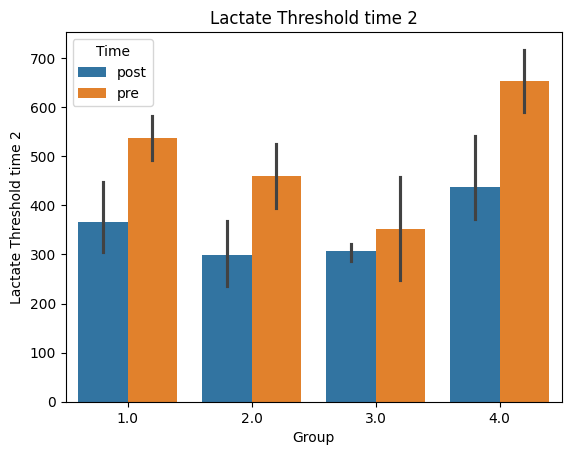

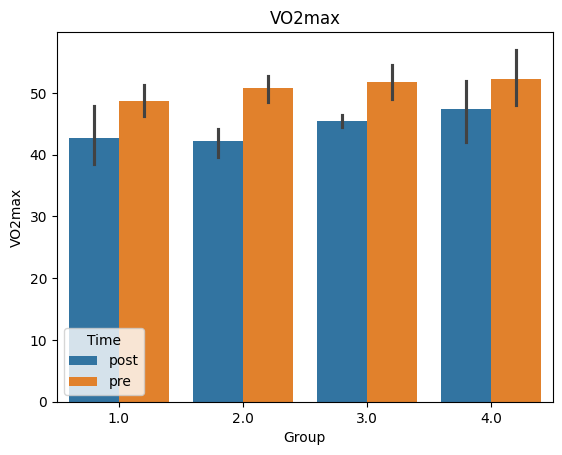

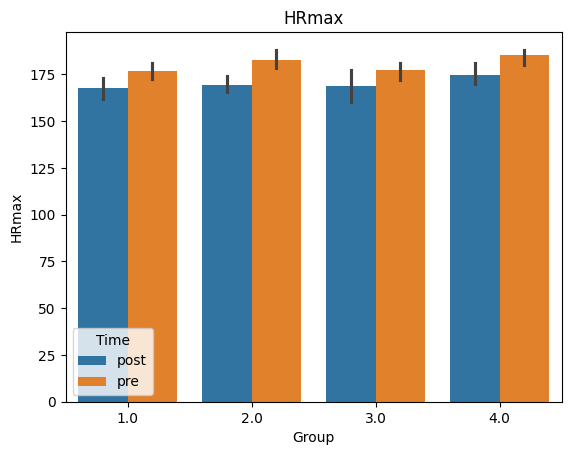

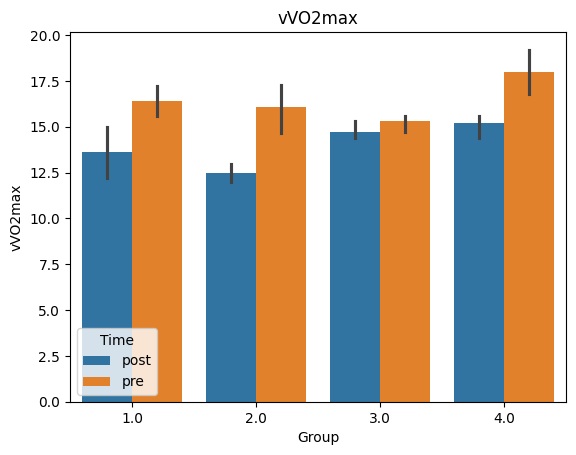

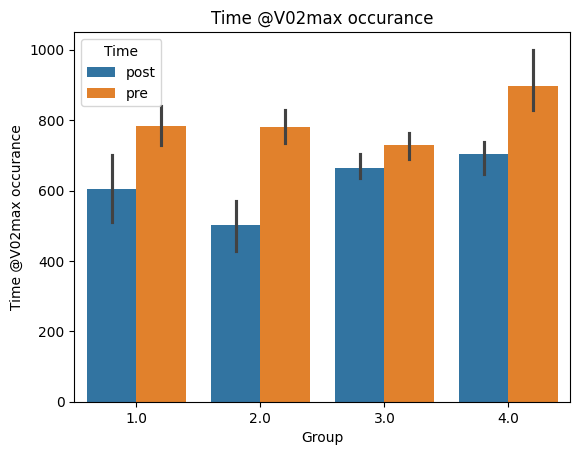

In [24]:
# draw bar charts for each variable pre- and post- intervention
for i in range(len(val_names)):
    draw_bar_chart(variable_pairs[i], val_names[i], title_str=val_names[i])

#### 4. Izvedi ustrezne statistične teste in ugotovi, kje so razlike statistično značilne.

Razlike med spremenljivkami pri katerih je Shapiro-Wilk test ugotovil normalno razporeditev ugotavljamo s parnim t-testem, drugače pa z Wilcoxonovim testom.

#### 5. Uporabi ustrezno statistično metodologijo in jo ustrezno zapiši.

Za ugotavljanje statistično značilnih razlik med spremenljivkami *lactate threshold 1 heart rate*, *lactate threshold 1 test speed*, *lactate threshold 1 test time*, *lactate threshold 2 heart rate*, *lactate threshold 2 test speed* bomo uporabili Wilcoxonov test, saj so nenormalno razporejene. Gledali bomo torej razlike med medianami teh vrednosti pred in po intervenciji.

Za ugotavljanje statistično značilnih razlik med spremenljivkami *lactate threshold 2 test time*, *VO2max*, *HRmax*, *vVO2max/km/h*, *time at VO2max occurance* bomo uporabili parni t-test, saj so normalno razporejene. Gledali bomo torej razlike med povprečji teh vrednosti pred in po intervenciji.

#### 6. Ustrezno predstavi rezultate in jih komentiraj.

In [36]:
# create wilcoxon tests for all non-normally distributed variables and paired t-test for normally distributed variables
from scipy.stats import ttest_rel, wilcoxon
test_results = []

for pair, is_normal in zip(variable_pairs, normality):
    pre_data = df[pair[0]]
    post_data = df[pair[1]]
    if is_normal:
        stat, p = ttest_rel(pre_data, post_data)
        test_name = 'Paired t-test'
    else:
        stat, p = wilcoxon(pre_data, post_data, zero_method='wilcox', correction=False)
        test_name = 'Wilcoxon t-test'
    test_results.append({
        '': pair,
        'Test': test_name,
        'Statistic': stat,
        'p-value': p
    })

results_df = pd.DataFrame(test_results)
display(
    results_df.style
    .set_caption('Descriptive statistics: post intervention')
    .set_table_styles([
              {'selector': 'caption', 'props': [('font-size', '16px'), 
                                                ('font-weight', 'bold'), 
                                                ('border-bottom', '1px solid black'),
                                                ('width', '100%')]},
              {'selector': 'td:first-child', 'props': [('text-align', 'left'),
                                           ('font-weight', 'bold')]}
          ])\
           .hide())
    

,Test,Statistic,p-value
"['LACTATE THRESHOLD 1 PRE-TEST HEART RATE (bpm)', 'LACTATE THRESHOLD 1 POST TEST HEART RATE (bpm)']",Wilcoxon t-test,5.500000,0.000107
"['LACTATE THRESHOLD 1 PRE TEST SPEED (km/h)', 'LACTATE THRESHOLD 1 POST TEST SPEED (km/h)']",Wilcoxon t-test,0.000000,0.000911
"['LACTATE THRESHOLD 1 PRE TEST TIME (sec)', 'LACTATE THRESHOLD 1 POST TEST TIME (sec)']",Wilcoxon t-test,7.000000,0.000145
"['LACTATE THRESHOLD 2 PRE TEST HEART RATE (bpm)', 'LACTATE THRESHOLD 2 POST TEST HEART RATE (bpm)']",Wilcoxon t-test,7.000000,0.000145
"['LACTATE THRESHOLD 2 PRE TEST SPEED (km/h)', 'LACTATE THRESHOLD 2 POST TEST SPEED (km/h)']",Wilcoxon t-test,0.000000,0.000591
"['LACTATE THRESHOLD 2 PRE TEST TIME (sec)', 'LACTATE THRESHOLD 2 POST TEST TIME (sec)']",Paired t-test,-5.538460,0.000036
"['V02MAX (ml/kg/min) PRE-TEST', 'V02MAX (ml/kg/min) POST TEST']",Paired t-test,-7.937485,0.000000
"['HRmax (pre)', 'Hrmax (post)']",Paired t-test,-7.098577,0.000002
"['vVO2max/ km/h (pre)', 'vVo2max/ km/h (post)']",Paired t-test,-6.767459,0.000003
"['Time @V02max occurance (pre)', 'Time @V02max occurance (post)']",Paired t-test,-7.093058,0.000002


**Interpretacija:** S parnim T-testom (normalna porazdelitev spremenljivk) in Wilcoxonov-im testom smo preverjali naslednji hipotezi.
H0: Ne obstajajo statistično značilne razlike za posamezno spremenljivko pred in po intervenciji (HIIT vadba).
H1: Obstajajo statistično značilne razlike za posamezno spremenljivko pred in po intervenciji.

P-vrednosti vseh testov so krepko pod mejno vrednostjo 0.05, zato lahko rečemo, da intervencija statistično značilno vpliva na maksimalni srčni utrip, maksimalno porabo kisika in nivo laktatnega praga. Ti fiziološki parametri so pokazatelji izboljšane kardiovaskularne sposobnosti in vzdržljivosti.